In [2]:
%matplotlib inline
from config_calc import *
from glob import glob
import matplotlib.pyplot as plt
plt.rcParams['mathtext.default']='regular'
import matplotlib.colors as colors

import cmocean
import colorbrewer
import plot_tools

from config_calc import *
from proc_cesm_le import open_ens
                                     

In [3]:
varlist = ['O2','AOU'] #,'TEMP']
op = 'ann_dft_aavg'

#-- read datasets
tr85 = open_ens('tr85',op,varlist)
tr45 = open_ens('tr85',op,varlist)

#-- compute derived
v = 'O2sat'
tr85[v] = tr85['AOU'] + tr85['O2']
tr45[v] = tr45['AOU'] + tr45['O2']
varlist.append(v)  
tr85

<xarray.Dataset>
Dimensions:  (ens: 33, nlat: 384, nlon: 320, time: 182, z_t: 60)
Dimensions without coordinates: ens, nlat, nlon, time, z_t
Data variables:
    KMT      (ens, nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    TAREA    (ens, nlat, nlon) float64 1.125e+13 1.125e+13 1.124e+13 ...
    TLAT     (ens, nlat, nlon) float64 -79.22 -79.22 -79.22 -79.22 -79.22 ...
    TLONG    (ens, nlat, nlon) float64 320.6 321.7 322.8 323.9 325.1 326.2 ...
    UAREA    (ens, nlat, nlon) float64 1.423e+13 1.423e+13 1.423e+13 ...
    ULAT     (ens, nlat, nlon) float64 -78.95 -78.95 -78.95 -78.95 -78.95 ...
    ULONG    (ens, nlat, nlon) float64 321.1 322.3 323.4 324.5 325.6 326.8 ...
    O2       (ens, time, z_t) float64 9.029e+20 9.03e+20 9.033e+20 8.874e+20 ...
    AOU      (ens, time, z_t) float64 4.29e+18 4.708e+18 6.278e+18 9.702e+18 ...
    O2sat    (ens, time, z_t) float64 9.072e+20 9.077e+20 9.096e+20 ...

### compute ensemble mean

In [4]:
tr85a = tr85.mean(dim='ens')
tr85a

<xarray.Dataset>
Dimensions:  (nlat: 384, nlon: 320, time: 182, z_t: 60)
Dimensions without coordinates: nlat, nlon, time, z_t
Data variables:
    KMT      (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    TAREA    (nlat, nlon) float64 1.125e+13 1.125e+13 1.124e+13 1.124e+13 ...
    TLAT     (nlat, nlon) float64 -79.22 -79.22 -79.22 -79.22 -79.22 -79.22 ...
    TLONG    (nlat, nlon) float64 320.6 321.7 322.8 323.9 325.1 326.2 327.3 ...
    UAREA    (nlat, nlon) float64 1.423e+13 1.423e+13 1.423e+13 1.423e+13 ...
    ULAT     (nlat, nlon) float64 -78.95 -78.95 -78.95 -78.95 -78.95 -78.95 ...
    ULONG    (nlat, nlon) float64 321.1 322.3 323.4 324.5 325.6 326.8 327.9 ...
    O2       (time, z_t) float64 9.029e+20 9.03e+20 9.033e+20 8.874e+20 ...
    AOU      (time, z_t) float64 4.29e+18 4.708e+18 6.278e+18 9.702e+18 ...
    O2sat    (time, z_t) float64 9.072e+20 9.077e+20 9.096e+20 8.971e+20 ...

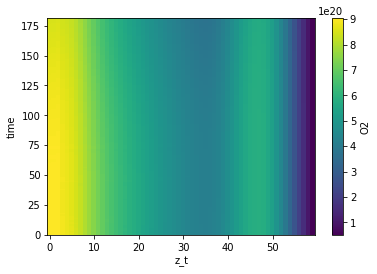

In [7]:
tr85a.O2.plot()